In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats  #to plot QQ plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression #algo
from sklearn.tree import DecisionTreeClassifier   #algo

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df  = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)    #filling missing values

C:\Users\athar\AppData\Local\Temp\ipykernel_6296\1607783333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)    #filling missing values


In [4]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                test_size=0.2,
                                                random_state=42)

C:\Users\athar\AppData\Local\Temp\ipykernel_6296\2959872010.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])        #plot for age


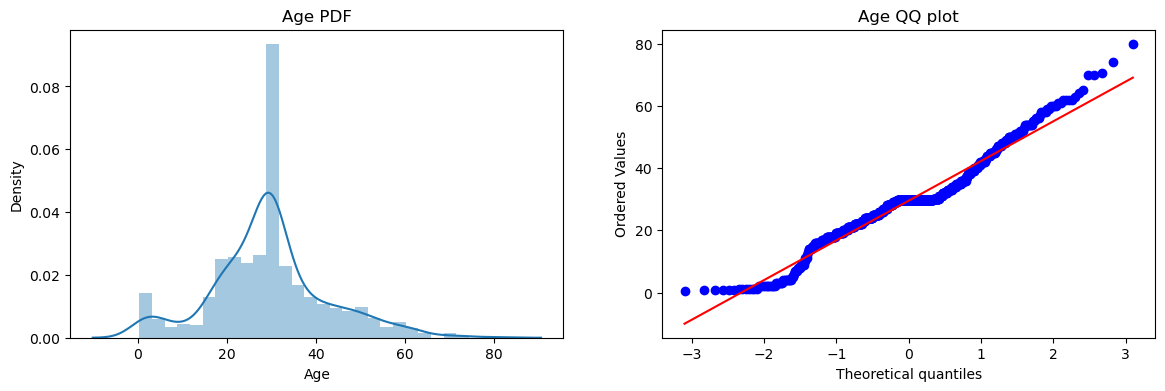

In [8]:
#plotting for age(PDF and QQ)

plt.figure(figsize=(14,4))          #dimensions of the plot
plt.subplot(121)                    #size ratio of both the plot
sns.distplot(X_train['Age'])        #plot for age
plt.title('Age PDF')                

plt.subplot(122)                     
stats.probplot(X_train['Age'],dist='norm' , plot=plt)    #QQ plot using stats.probplot
plt.title('Age QQ plot')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_6296\2635820471.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])        #plot for age


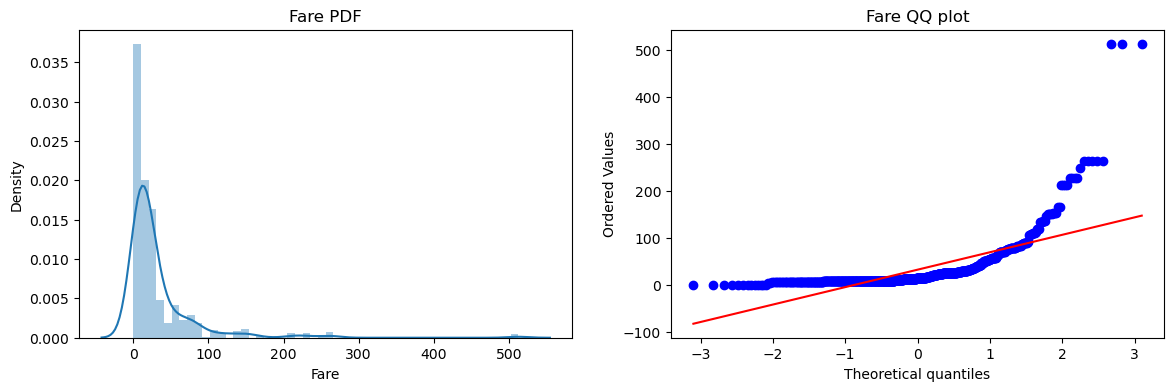

In [9]:
#plotting for Fare(PDF and QQ)

plt.figure(figsize=(14,4))          #dimensions of the plot
plt.subplot(121)                    #size ratio of both the plot
sns.distplot(X_train['Fare'])        #plot for age
plt.title('Fare PDF')                

plt.subplot(122)                     
stats.probplot(X_train['Fare'],dist='norm' , plot=plt)    #QQ plot using stats.probplot
plt.title('Fare QQ plot')
plt.show()

#it is not normally distributed it is left skewed 

In [10]:
#Checking predictions before function transformation

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

y_LR = clf.predict(X_test)
y_DTC  = clf2.predict(X_test)

print("Accuracy LR = ",accuracy_score(Y_test,y_LR))
print("Accuracy DTC = ",accuracy_score(Y_test,y_DTC))

Accuracy LR =  0.6480446927374302
Accuracy DTC =  0.6815642458100558


In [12]:
#Appling log transformer on both

In [13]:
trf = FunctionTransformer(func=np.log1p)

In [14]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf.fit(X_train_trans,Y_train)
clf2.fit(X_train_trans,Y_train)

y_LR = clf.predict(X_test_trans)
y_DTC  = clf2.predict(X_test_trans)

print("Accuracy LR = ",accuracy_score(Y_test,y_LR))
print("Accuracy DTC = ",accuracy_score(Y_test,y_DTC))

Accuracy LR =  0.6815642458100558
Accuracy DTC =  0.6871508379888268


In [17]:
#We can see difference between LR

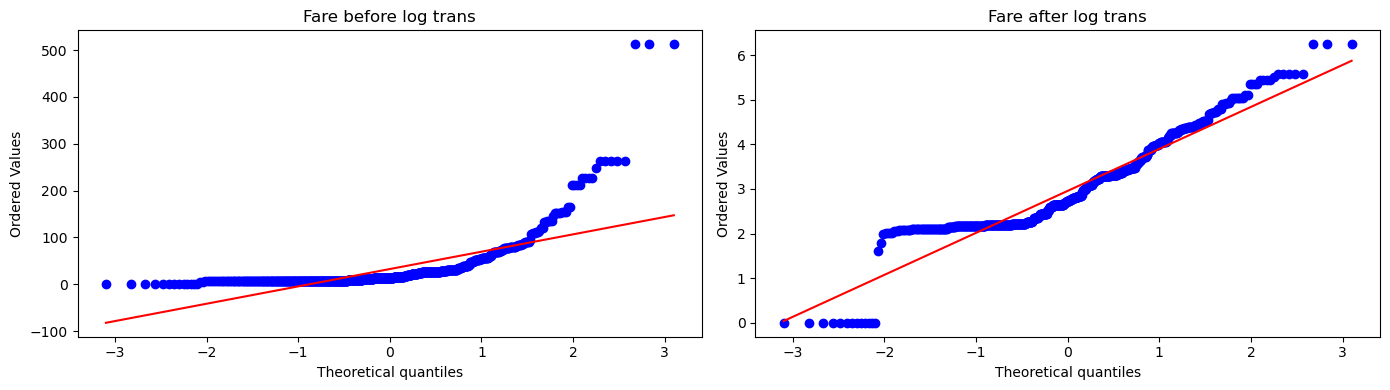

In [18]:
plt.figure(figsize=(14, 4))

# First subplot - before transformation
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before log trans')

# Second subplot - after transformation
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
stats.probplot(X_train_trans['Fare'], dist='norm', plot=plt)
plt.title('Fare after log trans')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

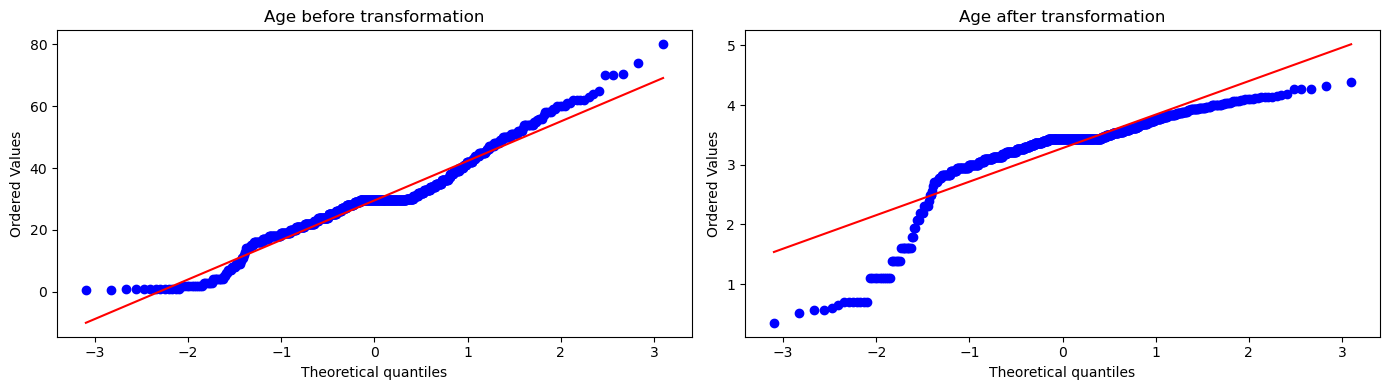

In [19]:
plt.figure(figsize=(14, 4))

# First subplot - before transformation
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before transformation')

# Second subplot - after transformation
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
stats.probplot(X_train_trans['Age'], dist='norm', plot=plt)
plt.title('Age after transformation')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

#It became bad after transformation because it was already normally distributed

In [29]:
def apply(transform):
    X = df.iloc[:,1:3]
    Y = df.iloc[:,0]
    trf =  ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],
                            remainder='passthrough')
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()

    print('Accuracy',np.mean(cross_val_score(clf,X_trans,Y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    stats.probplot(X['Fare'],dist="norm",plot=plt)
    plt.title("Fare Before Transform")

    plt.subplot(1, 2, 2)
    stats.probplot(X_trans[:,0],dist="norm",plot=plt)
    plt.title("Fare After Transform")
    plt.tight_layout()
    plt.show()

In [36]:
apply(lambda x: np.log1p)  #calling function to apply diff maths tranform on the Fare column

ValueError: The output of the 'log' transformer should be 2D (numpy array, scipy sparse array, dataframe).